# MINSHU DUBEY AND DANNI JIN

# Project 7

### Part I: RNN/LSTM/GRU

In this exercise, you are to work in your previous group on stock market forecast. Collect performance data for a period of 12 months for a favorite stock (Apple, Google, etc.) and perform the following tasks:

1) Use the most accurate model (LSTM or GRU)  that best predicts the collected data pertaining to the past 12 months. Pay special attention to the selected #units, activation functions, dropouts, dense layer configuration, etc.

2) Use your model from part 1 to make predictions for the next month, next 5 months, and the next 10 months. 

3) Make sure to plot your results in both parts 1 and 2.

4) Fully discuss and justify your results.

### **The dataset we have taken is from Yahoo finance : https://in.finance.yahoo.com/quote/MSFT/history?p=MSFT**

## SETUP

In [2]:
!pip install tensorflow==1.14.0

In [3]:

# Common imports
#we import numpy for making scientific computations
import numpy as np

# pandas for loading and modifying datasets
import pandas as pd

#Sklearn libraries



import os
import datetime
import seaborn as sns
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import sklearn
import sklearn.preprocessing
from sklearn import preprocessing
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.layers.recurrent import GRU
from keras.models import load_model
import keras
import h5py
import requests
import math, time



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

### **we load data on Microsoft Croporation stock prices(around past 12 months).**

In [5]:
url = 'https://raw.githubusercontent.com/minsh30/Stock-Market-Forecast/master/MSFT.csv'
MSFT = pd.read_csv(url)

#To get a look at the dataset we’re using, we can check the head, which shows us the first five rows of our dataset.
MSFT.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-02,127.980003,128.000000,125.519997,126.209999,124.561966,27350200
1,2019-05-03,127.360001,129.429993,127.250000,128.899994,127.216843,24911100
2,2019-05-06,126.389999,128.559998,126.110001,128.149994,126.476624,24239800
3,2019-05-07,126.459999,127.180000,124.220001,125.519997,123.880966,36017700
4,2019-05-08,125.440002,126.370003,124.750000,125.510002,123.871117,28419000


## **DATASET ATTRIBUTES DESCRIPTION**
### The “Open” column represents the opening price for shares that day, The “High” column represents the highest price shares reached that day, The “Low” column represents the lowest price shares reached that day, The "Close" coloumn represents the closing price for shares that day ,  The “Adj Close” column reflects the closing price of the stock in relation to other stock attributes, The "Volume" coloumn represents the volume at which the trading went.

In [6]:
#Description of the dataset
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,147.859091,149.428814,146.175810,147.885850,147.176434,3.174631e+07
std,16.088289,16.438615,15.635003,16.102613,16.472953,1.813596e+07
min,121.279999,123.279999,119.010002,119.839996,118.712952,8.989200e+06
25%,136.880005,137.729996,135.369995,136.460007,135.497589,2.007820e+07
50%,141.009995,144.500000,139.529999,141.070007,140.208649,2.491110e+07
75%,158.779999,160.729996,157.270004,158.960007,158.596817,3.577210e+07
max,190.649994,190.699997,186.470001,188.699997,188.185989,9.707360e+07


## **Data Visualisation**

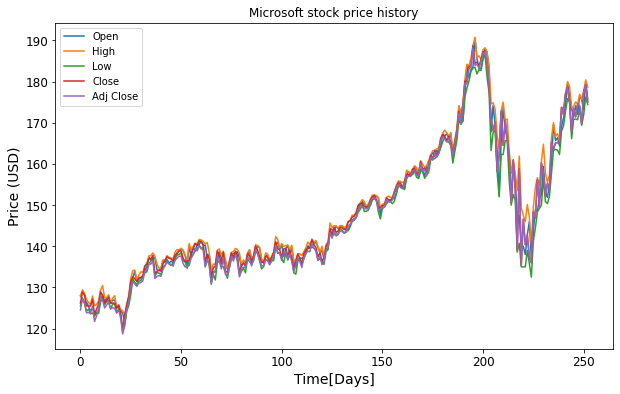

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(MSFT["Open"])
plt.plot(MSFT["High"])
plt.plot(MSFT["Low"])
plt.plot(MSFT["Close"])
plt.plot(MSFT["Adj Close"])
plt.title('Microsoft stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Time[Days]')
plt.legend(['Open','High','Low','Close','Adj Close'], loc='upper left')
plt.show()

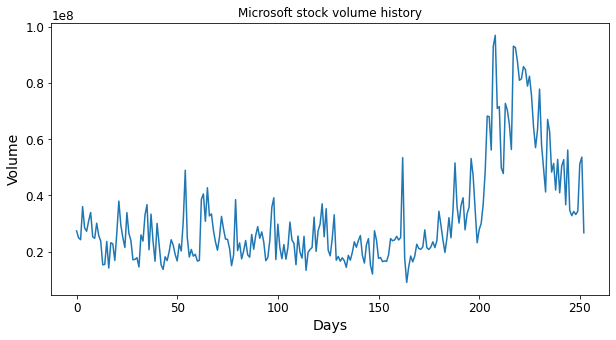

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(MSFT["Volume"])
plt.title('Microsoft stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

### **Data Cleaning**


In [9]:
#Checking if have any null values

print("checking if any null values are present\n", MSFT.isna().sum())

checking if any null values are present
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# **Data Manipulating and Normalization**

### Normalization is changing the values of numeric columns in the dataset to a common scale, which helps the performance of our model. To scale the training dataset we use Scikit-Learn’s MinMaxScaler with numbers between zero and one.

In [0]:
# function for min-max normalization of stock
def normalize_data(MSFT):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    MSFT['Open'] = min_max_scaler.fit_transform(MSFT.Open.values.reshape(-1,1))
    MSFT['High'] = min_max_scaler.fit_transform(MSFT.High.values.reshape(-1,1))
    MSFT['Low'] = min_max_scaler.fit_transform(MSFT.Low.values.reshape(-1,1))
    MSFT['Close'] = min_max_scaler.fit_transform(MSFT['Close'].values.reshape(-1,1))
    return MSFT

In [0]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns) # 5
    data = stock.to_numpy() 
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 22days
    result = np.array(result)

    row = round(0.9 * result.shape[0]) # 90% split
    train = result[:int(row), :] # 90% date, all features 
    
    x_train = train[:, :-1] 
    y_train = train[:, -1][:,-1]
    
    x_test = result[int(row):, :-1] 
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

**Data Manipulation** turns out to be dropping **Volume** and **Adj Close** coloumn because the main prediction of the Stock Market revolves around 4 main features **"Open" , "High" , "Low" & "Close"**.

In [12]:
# choose one stock
MSFT_stock = MSFT.copy()
MSFT_stock.drop(['Date'],1,inplace=True)
MSFT_stock.drop(['Adj Close'],1,inplace=True)
MSFT_stock.drop(['Volume'],1,inplace=True)

cols = list(MSFT_stock.columns.values)
print('MSFT_stock.columns.values = ', cols)

MSFT_stock.columns.values =  ['Open', 'High', 'Low', 'Close']


In [0]:
# normalize stock
MSFT_stock_norm = MSFT_stock.copy()
MSFT_stock_norm = normalize_data(MSFT_stock_norm)

## **Split the dataset into Train and Test**

In [14]:
# create train, test data
seq_len = 22 # choose sequence length
x_train, y_train, x_test, y_test = load_data(MSFT_stock_norm, seq_len)

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)

print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (207, 22, 4)
y_train.shape =  (207,)
x_test.shape =  (23, 22, 4)
y_test.shape =  (23,)


## Data Visualisation after Normalizing and Cleaning Data 

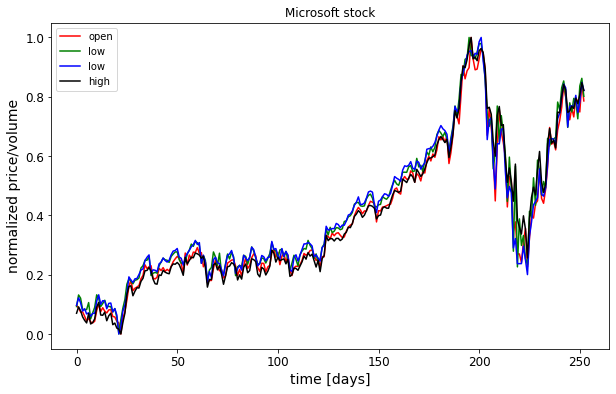

In [15]:
plt.figure(figsize=(10, 6));
plt.plot(MSFT_stock_norm.Open.values, color='red', label='open')
plt.plot(MSFT_stock_norm.Close.values, color='green', label='low')
plt.plot(MSFT_stock_norm.Low.values, color='blue', label='low')
plt.plot(MSFT_stock_norm.High.values, color='black', label='high')

plt.title('Microsoft stock')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

## **Model Creation**

**LSTM MODEL:** The Long Short-Term Memory network, or LSTM network, is a recurrent neural network that is trained using Backpropagation Through Time and overcomes the vanishing gradient problem. LSTM networks have memory blocks that are connected through layers.

**GRU MODEL:** The GRU, known as the Gated Recurrent Unit is an RNN architecture, which is similar to LSTM units. The GRU comprises of the reset gate and the update gate instead of the input, output and forget gate of the LSTM.

### **LSTM**

In [0]:
def build_model(layers):
    d = 0.2
    model = Sequential()
    
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
        
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    #adam = keras.optimizers.Adam(decay=0.2)
        
    start = time.time()
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

### **GRU**

In [0]:
def build_model_gru(layers):
    d = 0.2
    model_gru = Sequential()
    
    model_gru.add(GRU(256, input_shape=(layers[1], layers[0]), return_sequences=True))
    model_gru.add(Dropout(d))
        
    model_gru.add(GRU(256, input_shape=(layers[1], layers[0]), return_sequences=False))
    model_gru.add(Dropout(d))
        
    model_gru.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model_gru.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    adam = keras.optimizers.Adam(decay=0.2)
        
    start = time.time()
    model_gru.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model_gru

### **Training LSTM Model**

In [18]:
model = build_model([4,seq_len,1])

Compilation Time :  0.04435133934020996


In [20]:
lstm_his=model.fit(x_train,y_train,batch_size=32,epochs=20,validation_split=0.2,verbose=1)


Train on 165 samples, validate on 42 samples
Epoch 1/20
165/165 [==============================] - 2s 12ms/step - loss: 0.1121 - accuracy: 0.0000e+00 - val_loss: 0.0622 - val_accuracy: 0.0238
Epoch 2/20
165/165 [==============================] - 1s 7ms/step - loss: 0.0165 - accuracy: 0.0000e+00 - val_loss: 0.1435 - val_accuracy: 0.0000e+00
Epoch 3/20
165/165 [==============================] - 1s 8ms/step - loss: 0.0115 - accuracy: 0.0000e+00 - val_loss: 0.0711 - val_accuracy: 0.0238
Epoch 4/20
165/165 [==============================] - 1s 8ms/step - loss: 0.0093 - accuracy: 0.0000e+00 - val_loss: 0.0845 - val_accuracy: 0.0000e+00
Epoch 5/20
165/165 [==============================] - 1s 7ms/step - loss: 0.0060 - accuracy: 0.0000e+00 - val_loss: 0.0493 - val_accuracy: 0.0238
Epoch 6/20
165/165 [==============================] - 1s 7ms/step - loss: 0.0035 - accuracy: 0.0000e+00 - val_loss: 0.0710 - val_accuracy: 0.0238
Epoch 7/20
165/165 [==============================] - 1s 7ms/step - l

### **Training GRU Model**

In [19]:
model_gru = build_model_gru([4,seq_len,1])

Compilation Time :  0.0444333553314209


In [21]:
gru_his=model_gru.fit(x_train,y_train,batch_size=32,epochs=20,validation_split=0.2,verbose=1)

Train on 165 samples, validate on 42 samples
Epoch 1/20
165/165 [==============================] - 2s 14ms/step - loss: 0.1163 - accuracy: 0.0000e+00 - val_loss: 0.0891 - val_accuracy: 0.0000e+00
Epoch 2/20
165/165 [==============================] - 1s 9ms/step - loss: 0.0112 - accuracy: 0.0000e+00 - val_loss: 0.0687 - val_accuracy: 0.0238
Epoch 3/20
165/165 [==============================] - 1s 9ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0311 - val_accuracy: 0.0238
Epoch 4/20
165/165 [==============================] - 1s 9ms/step - loss: 0.0056 - accuracy: 0.0000e+00 - val_loss: 0.0442 - val_accuracy: 0.0238
Epoch 5/20
165/165 [==============================] - 1s 9ms/step - loss: 0.0032 - accuracy: 0.0000e+00 - val_loss: 0.0254 - val_accuracy: 0.0238
Epoch 6/20
165/165 [==============================] - 1s 9ms/step - loss: 0.0024 - accuracy: 0.0000e+00 - val_loss: 0.0302 - val_accuracy: 0.0238
Epoch 7/20
165/165 [==============================] - 1s 9ms/step - loss: 

## Plotting the results of Training of both LSTM and GRU

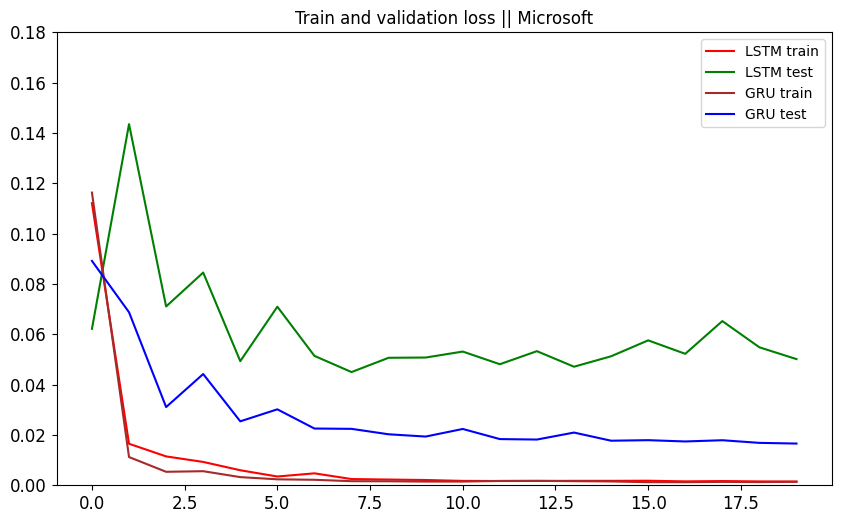

In [23]:
plt.figure(figsize=(10,6),dpi=100)
plt.plot(lstm_his.history['loss'],label='LSTM train',color='red')
plt.plot(lstm_his.history['val_loss'],label='LSTM test',color='green')
plt.plot(gru_his.history['loss'],label='GRU train',color='brown')
plt.plot(gru_his.history['val_loss'],label='GRU test',color='blue')
plt.xlabel=('epochs')
plt.ylabel=('loss')
plt.ylim((0,0.18))
plt.legend()
plt.title('Train and validation loss || Microsoft')
plt.show()

### Here, We can say after seeing graph results that LSTM Train loss << than Validation loss which means it is underfitting.  We did same with GRU and results were The Train Loss << Validation Loss  means underfitting

### **But GRU Model was less underfitted in comparison to LSTM model**

## **Evaluating Models**

In [24]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]


model_score(model, x_train, y_train, x_test, y_test)
model_score(model_gru, x_train, y_train, x_test, y_test)

Train Score: 0.01114 MSE (0.11 RMSE)
Test Score: 0.02065 MSE (0.14 RMSE)
Train Score: 0.00415 MSE (0.06 RMSE)
Test Score: 0.00952 MSE (0.10 RMSE)


(0.0041514527466562055, 0.009517377242445946)

## **As GRU is less underfitted than LSTM we are taking GRU model for further Prediction in Stock Market**

In [25]:
diff=[]
ratio=[]
p = model_gru.predict(x_test)
print (p.shape)
# for each data index in test data
for u in range(len(y_test)):
    # pr = prediction day u
    pr = p[u][0]
    # (y_test day u / pr) - 1
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))



(23, 1)


In [0]:
#googl = pd.read_csv(url,index_col="Date",parse_dates=True)
def denormalize(MSFT, normalized_value): 
    MSFT = MSFT['Close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    #return goo.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(MSFT)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

newp = denormalize(MSFT, p)
newy_test = denormalize(MSFT, y_test)
#newy_test = denormalize(goo, y_test)

## **Predicting Stock Market for one month**

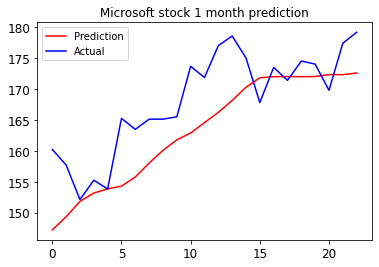

In [27]:
import matplotlib.pyplot as plt2


plt2.plot(newp,color='red', label='Prediction')
plt2.plot(newy_test,color='blue', label='Actual')

#plt2.plot(np.arange(y_train_pred.shape[0],y_train_pred.shape[0]+y_test_pred.shape[0]),newp,color='red', label='Prediction')
#plt2.plot(np.arange(y_train.shape[0],y_train.shape[0]+y_test.shape[0]),newy_test,color='blue', label='Actual')
plt2.title('Microsoft stock 1 month prediction')
plt2.legend(loc='best')
plt2.show()

## **Predicting Stock Market for  next FIVE and TEN monthS**

In [28]:
diff=[]
ratio=[]
M = model_gru.predict(x_train)
print (M.shape)
# for each data index in test data
for u in range(len(y_train)):
    # pr = prediction day u
    pr = M[u][0]
    # (y_test day u / pr) - 1
    ratio.append((y_train[u]/pr)-1)
    diff.append(abs(y_train[u]- pr))



(207, 1)


In [0]:
ten = denormalize(MSFT, M)
ten_test = denormalize(MSFT, y_train)

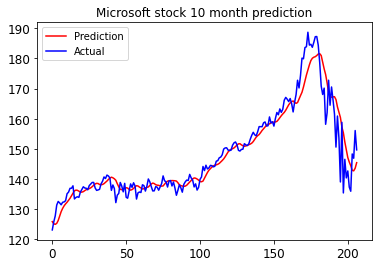

In [30]:
import matplotlib.pyplot as plt2


plt2.plot(ten,color='red', label='Prediction')
plt2.plot(ten_test,color='blue', label='Actual')

#plt2.plot(np.arange(y_train_pred.shape[0],y_train_pred.shape[0]+y_test_pred.shape[0]),newp,color='red', label='Prediction')
#plt2.plot(np.arange(y_train.shape[0],y_train.shape[0]+y_test.shape[0]),newy_test,color='blue', label='Actual')
plt2.title('Microsoft stock 10 month prediction')
plt2.legend(loc='best')
plt2.show()

# **Conclusion**


### While doing prediction of next 5 and 10 months the exact price points from our predicted price were almost close to the actual Price.
### Though while predicting for next 1 month predicted points were'nt that close to the actual points,but our model did still indicate overall trends such as going up or down. This project teaches us how easily we can predict time series problem with models like GRU and LSTMs. Gru is better than  LSTM in computational efficiency also is a updated gate which needs less parameters and gates.
### But in predicting time series problems not only GRUs but even LSTM give effective results. 